<a href="https://colab.research.google.com/github/duong233/StockPrediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/MachineLearning/Stock

/content/drive/MyDrive/MachineLearning/Stock


#Read data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_fpt = pd.read_csv('Data/FPT.csv')
df_msn = pd.read_csv('Data/MSN.csv')
df_pnj = pd.read_csv('Data/PNJ.csv')
df_vic = pd.read_csv('Data/VIC.csv')

In [ ]:
df_fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [ ]:
df_fpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


#Visualize

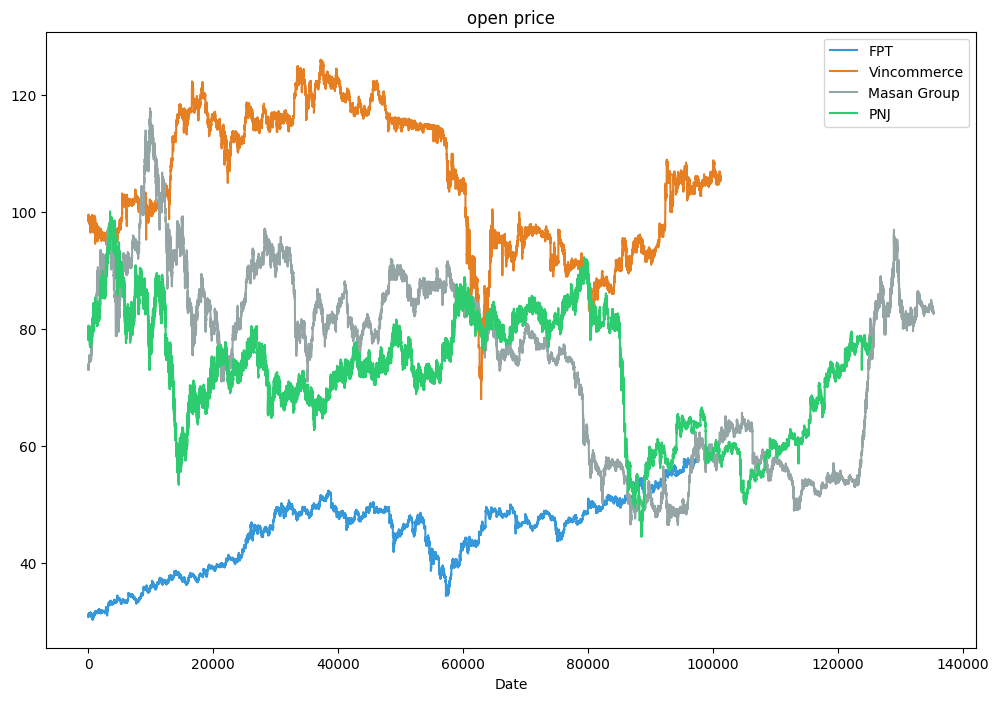

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_fpt['Open'], label="FPT", color="#3498db")
ax.plot(df_vic['Open'], label='Vincommerce', color="#e67e22")
ax.plot(df_msn['Open'], label="Masan Group", color="#95a5a6")
ax.plot(df_pnj['Open'], label="PNJ", color="#2ecc71")
ax.set_xlabel('Date')
ax.set_title('open price')
plt.legend()


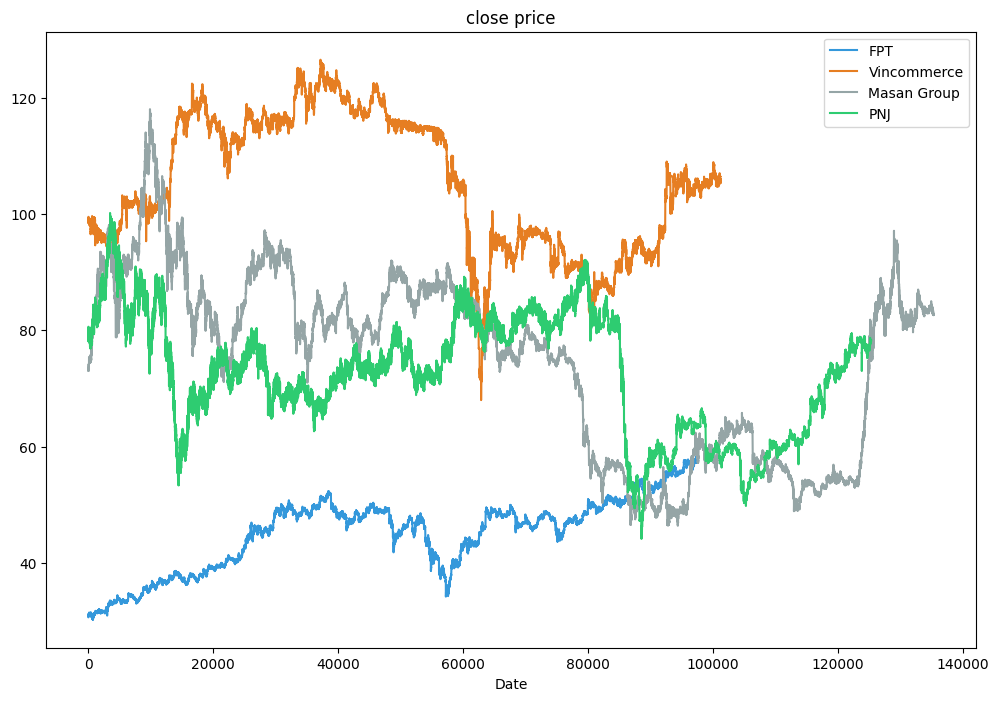

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_fpt['Close'], label="FPT", color="#3498db")
ax.plot(df_vic['Close'], label='Vincommerce', color="#e67e22")
ax.plot(df_msn['Close'], label="Masan Group", color="#95a5a6")
ax.plot(df_pnj['Close'], label="PNJ", color="#2ecc71")
ax.set_xlabel('Date')
ax.set_title('close price')
plt.legend()

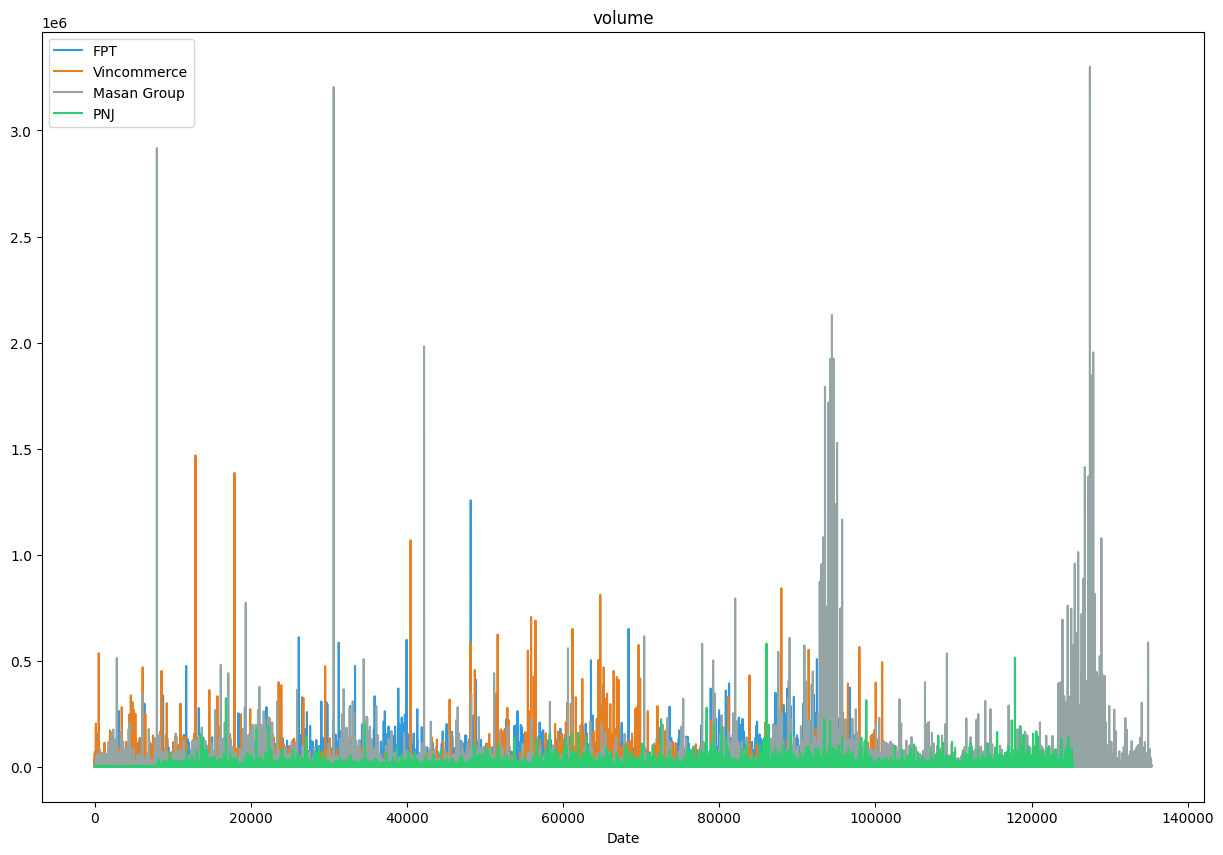

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(df_fpt['Volume'], label="FPT", color="#3498db")
ax.plot(df_vic['Volume'], label='Vincommerce', color="#e67e22")
ax.plot(df_msn['Volume'], label="Masan Group", color="#95a5a6")
ax.plot(df_pnj['Volume'], label="PNJ", color="#2ecc71")
ax.set_xlabel('Date')
ax.set_title('volume')
plt.legend()

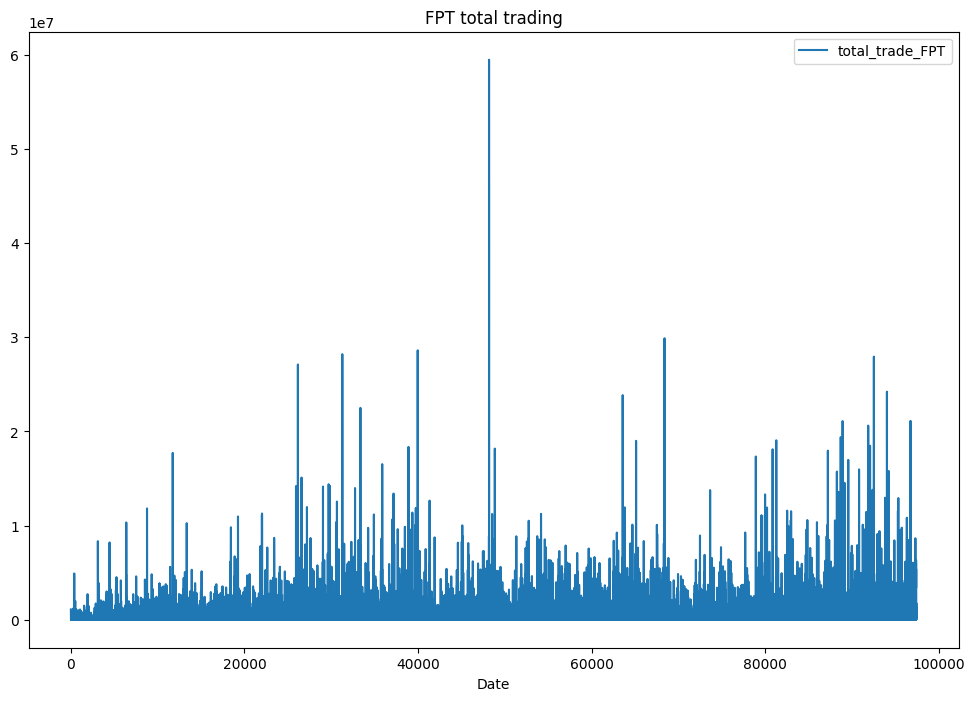

In [ ]:
df_fpt['total_trade'] = df_fpt['Open']*df_fpt['Volume']
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df_fpt['total_trade'], label="total_trade_FPT")
ax.set_xlabel("Date")
ax.set_title("FPT total trading")
plt.legend()

#Liner regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
fpt_train, fpt_test = train_test_split(df_fpt, test_size=0.1, shuffle=False) #use 90% of past data for training purpose, the rest will be consider as future data(testing)
vic_train, vic_test = train_test_split(df_vic, test_size=0.1, shuffle=False)
msn_train, msn_test = train_test_split(df_msn, test_size=0.1, shuffle=False)
pnj_train, pnj_test = train_test_split(df_pnj, test_size=0.1, shuffle=False)

In [ ]:
fpt_train

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,total_trade
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0,1093814.9
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0,5853.9
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0,34428.8
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0,65168.8
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0,691650.0
...,...,...,...,...,...,...,...,...,...
87660,FPT,10/20/2020 10:29,53.10,53.10,53.00,53.00,2060,0,109386.0
87661,FPT,10/20/2020 10:30,53.00,53.00,53.00,53.00,60,0,3180.0
87662,FPT,10/20/2020 10:31,53.00,53.10,53.00,53.10,2820,0,149460.0
87663,FPT,10/20/2020 10:32,53.10,53.10,53.00,53.00,6830,0,362673.0


take column 'Close' as the label

In [ ]:
X_train_FPT = fpt_train.drop(['Ticker','Close','Date/Time'], 1)
y_train_FPT = fpt_train['Close']
X_test_FPT = fpt_test.drop(['Ticker','Close','Date/Time'], 1)
y_test_FPT = fpt_test['Close']

<ipython-input-15-dbde4940e358>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_FPT = fpt_train.drop(['Ticker','Close','Date/Time'], 1)
<ipython-input-15-dbde4940e358>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test_FPT = fpt_test.drop(['Ticker','Close','Date/Time'], 1)


In [ ]:
X_train_VIC = vic_train.drop(['Ticker','Close','Date/Time'], 1)
y_train_VIC = vic_train['Close']
X_test_VIC= vic_test.drop(['Ticker','Close','Date/Time'], 1)
y_test_VIC = vic_test['Close']

<ipython-input-16-58047f793545>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_VIC = vic_train.drop(['Ticker','Close','Date/Time'], 1)
<ipython-input-16-58047f793545>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test_VIC= vic_test.drop(['Ticker','Close','Date/Time'], 1)


In [ ]:
X_train_MSN = msn_train.drop(['Ticker','Close','Date/Time'], 1)
y_train_MSN = msn_train['Close']
X_test_MSN = msn_test.drop(['Ticker','Close','Date/Time'], 1)
y_test_MSN = msn_test['Close']

<ipython-input-17-6a570d6f5ae0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_MSN = msn_train.drop(['Ticker','Close','Date/Time'], 1)
<ipython-input-17-6a570d6f5ae0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test_MSN = msn_test.drop(['Ticker','Close','Date/Time'], 1)


In [ ]:
X_train_PNJ = pnj_train.drop(['Ticker','Close','Date/Time'], 1)
y_train_PNJ = pnj_train['Close']
X_test_PNJ = pnj_test.drop(['Ticker','Close','Date/Time'], 1)
y_test_PNJ = pnj_test['Close']

<ipython-input-18-08af8898973c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_PNJ = pnj_train.drop(['Ticker','Close','Date/Time'], 1)
<ipython-input-18-08af8898973c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test_PNJ = pnj_test.drop(['Ticker','Close','Date/Time'], 1)


In [ ]:
clf = LinearRegression()
clf.fit(X_train_FPT,y_train_FPT)

LinearRegression()

In [ ]:
y_pred_FPT = clf.predict(X_test_FPT)

In [ ]:
fpt_test['Predictions'] = y_pred_FPT

In [ ]:
fpt_test

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,total_trade,Predictions
87665,FPT,10/20/2020 10:34,53.1,53.1,53.1,53.1,3100,0,164610.0,53.099896
87666,FPT,10/20/2020 10:35,53.0,53.1,53.0,53.1,3240,0,171720.0,53.070182
87667,FPT,10/20/2020 10:36,53.1,53.1,53.0,53.0,2970,0,157707.0,53.035788
87668,FPT,10/20/2020 10:37,53.1,53.1,53.0,53.0,2560,0,135936.0,53.035781
87669,FPT,10/20/2020 10:38,53.1,53.1,53.1,53.1,2110,0,112041.0,53.099878
...,...,...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.2,58.2,58.2,58.2,27470,0,1598754.0,58.200553
97402,FPT,12/22/2020 14:25,58.2,58.2,58.2,58.2,14820,0,862524.0,58.200190
97403,FPT,12/22/2020 14:26,58.2,58.2,58.2,58.2,500,0,29100.0,58.199779
97404,FPT,12/22/2020 14:29,58.1,58.1,58.1,58.1,2500,0,145250.0,58.099837


In [ ]:
clf_1 = LinearRegression()
clf_1.fit(X_train_VIC, y_train_VIC)
y_pred_VIC = clf_1.predict(X_test_VIC)
vic_test['Predictions'] = y_pred_VIC

In [ ]:
clf_2 = LinearRegression()
clf_2.fit(X_train_MSN, y_train_MSN)
y_pred_MSN = clf_1.predict(X_test_MSN)
msn_test['Predictions'] = y_pred_MSN

In [ ]:
clf_3 = LinearRegression()
clf_3.fit(X_train_PNJ, y_train_PNJ)
y_pred_PNJ = clf_1.predict(X_test_PNJ)
pnj_test['Predictions'] = y_pred_PNJ

#Visualize prediction

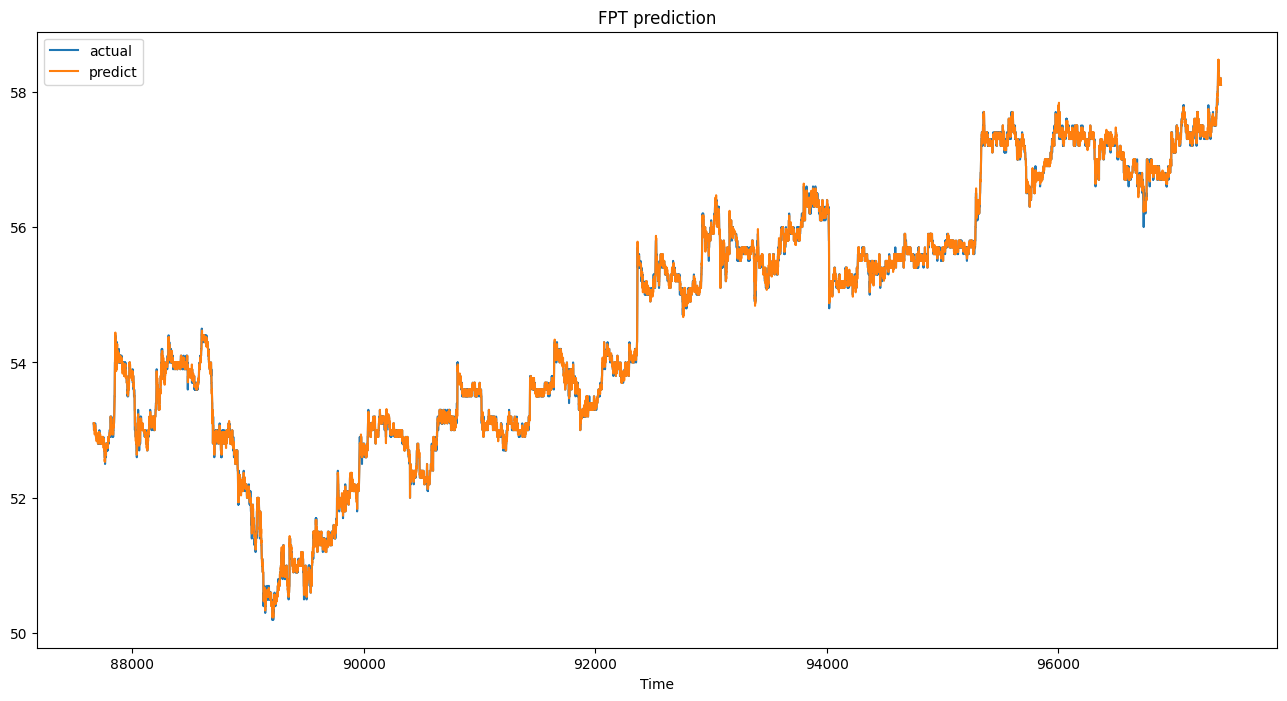

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
# ax.plot(fpt_train['Close'], label='training')
ax.plot(fpt_test['Close'], label='actual')
ax.plot(fpt_test['Predictions'], label='predict')
ax.set_xlabel('Time')
ax.set_title('FPT prediction')
ax.legend()

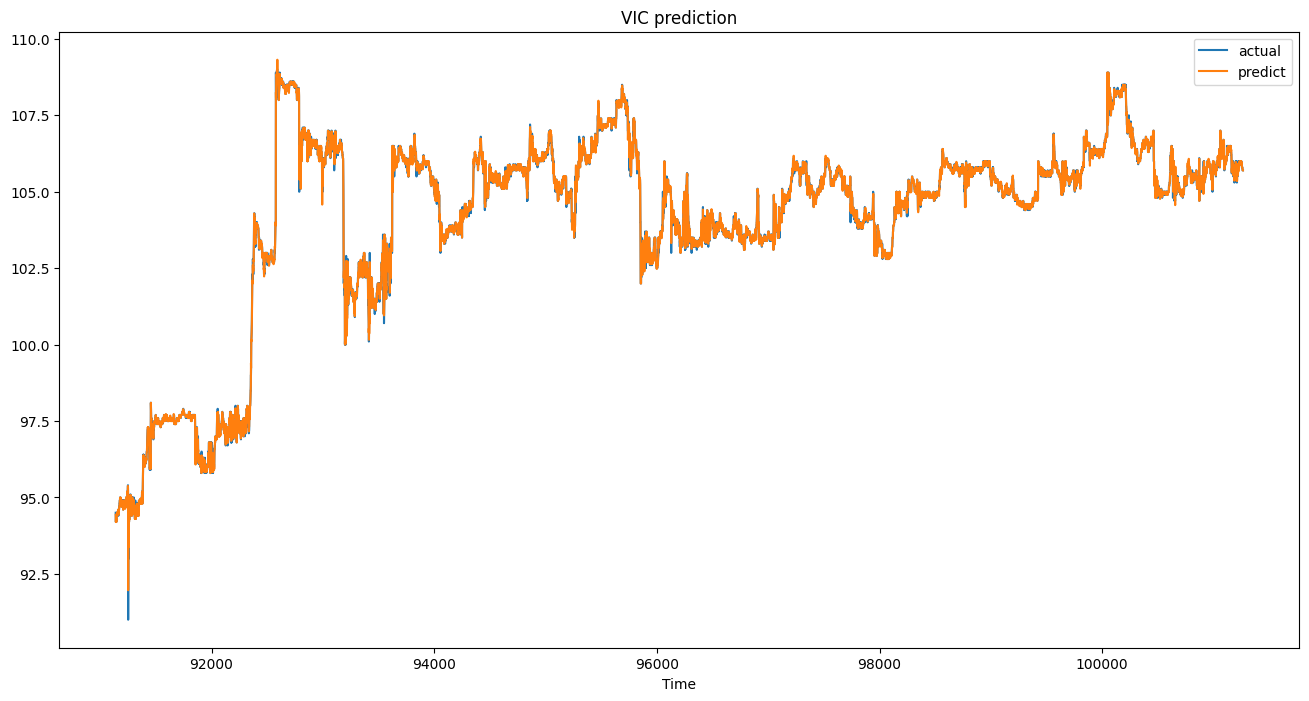

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
# ax.plot(fpt_train['Close'], label='training')
ax.plot(vic_test['Close'], label='actual')
ax.plot(vic_test['Predictions'], label='predict')
ax.set_xlabel('Time')
ax.set_title('VIC prediction')
ax.legend()

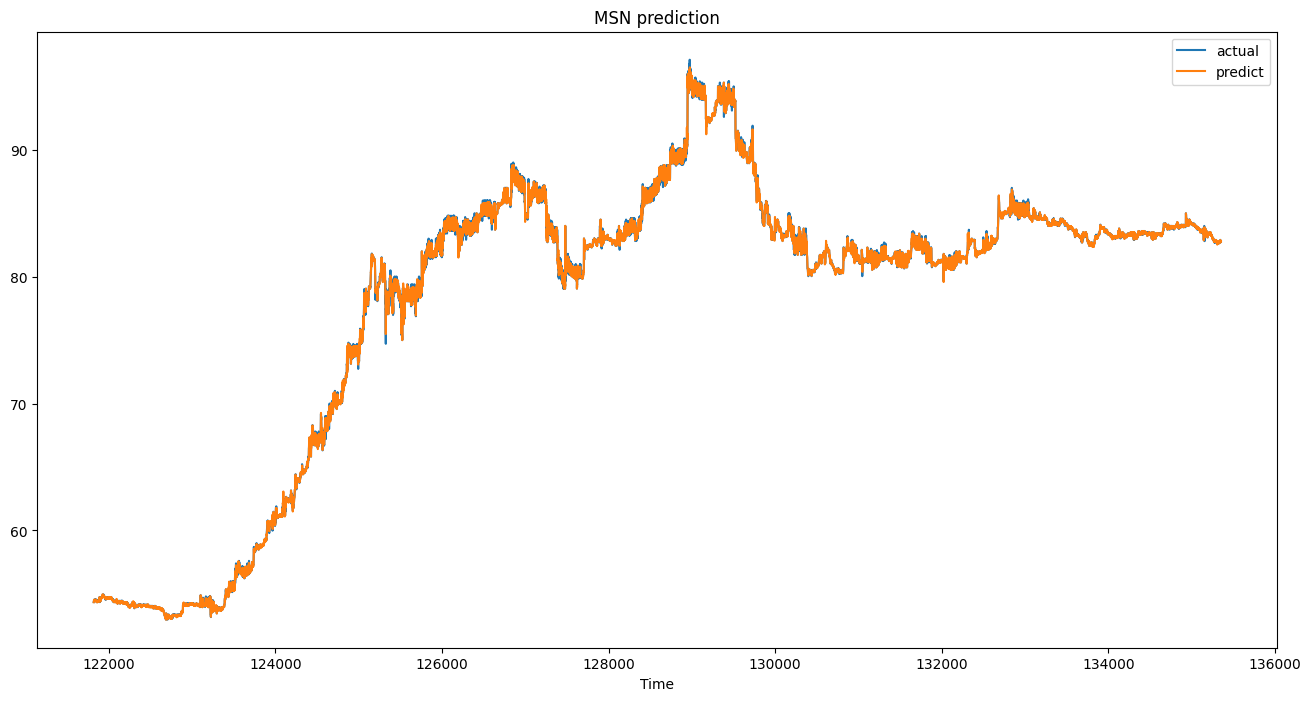

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
# ax.plot(fpt_train['Close'], label='training')
ax.plot(msn_test['Close'], label='actual')
ax.plot(msn_test['Predictions'], label='predict')
ax.set_xlabel('Time')
ax.set_title('MSN prediction')
ax.legend()

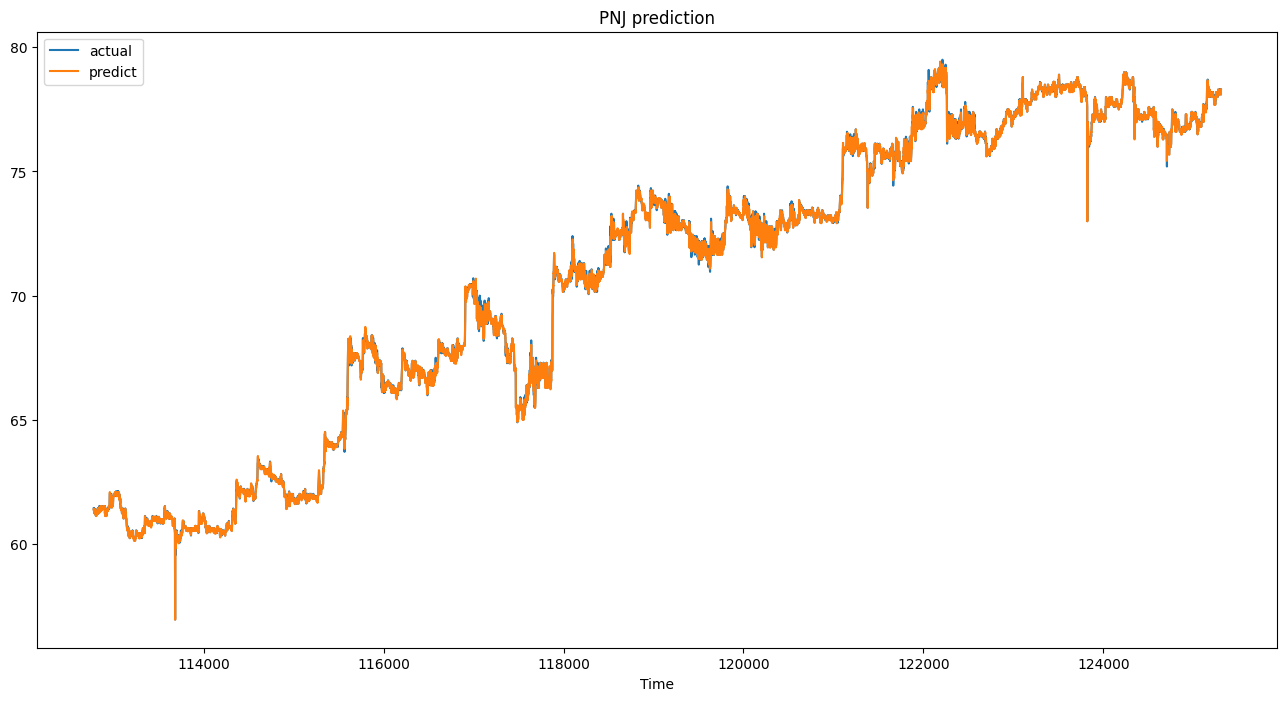

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
# ax.plot(fpt_train['Close'], label='training')
ax.plot(pnj_test['Close'], label='actual')
ax.plot(pnj_test['Predictions'], label='predict')
ax.set_xlabel('Time')
ax.set_title('PNJ prediction')
ax.legend()

Our prediction is close to reality